### Find the values of E and S using a Gaussian fit

The last step of the analysis is to find the E and S values that correspond to the ensemble averages of the dataset. To do so, a Gaussian curve is fitted to the histogram. In case one population appears to be present a single Gaussian fit can be used (section 1). In the case of two populations a double Gaussian fit should be applied (section 2).

In [1]:
import seaborn as sns, numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from pylab import *
from scipy.optimize import curve_fit

#### Section 1: single population

In [90]:
# Paste the copied data that was the result of running script 8
E = pd.Series([0.2005741857788988, 0.5826026387116798, 0.5537672606067006, 0.5147740202643478, 0.6019069293795759, 0.1757708272453456, 0.48098549425440074, 0.5174431591679342, 0.5824747281539935, 0.5562862671220177, 0.5428068146372991, 0.4790415429879672, 0.5460041244848105, 0.6109200921239092, 0.488361611363487, 0.1613815632337283, 0.5920432973152729, 0.770468377967239, 0.5545198125769449, 0.25147357215391497, 0.5875704304390182, 0.2776119902124813, 0.652044843293818, 0.2237124228037359, 0.24752529120414887, 0.251743761461557, 0.3983645365007359, 0.5041975661962547, 0.5599572544484913, 0.21220740996264212, 0.6969735958748741, 0.5879187098869467, 0.5959278920486785, 0.5115327333139071, 0.5798076965800822, 0.7279325142095993, 0.49829715858624696, 0.5605562668610158, 0.4488548630211883, 0.4274301411232992, 0.24042368487678623, 0.24528989175912463, 0.5481167589415036, 0.40180715371911213, 0.2284166779072916, 0.20165783815898236, 0.31794241493190456, 0.243741226583295, 0.47853766300057543, 0.621000984199648, 0.5458972112119939, 0.2133168625903404, 0.5530766489089859, 0.8249440717993238, 0.40066069755081335, 0.5466870680104133, 0.6295551144047921, 0.5481308023218474, 0.20551028745106986, 0.6624436374210776, 0.19745834146951285, 0.7360078381476557, 0.16868314028266929, 0.5532409925215521, 0.5490730690856173, 0.5899084051600444, 0.4618501387877742, 0.22845897493008452, 0.48470029517798097, 0.5944610985755763, 0.25629206918798764, 0.2513124319528699, 0.49880934541422495, 0.2898008113592327, 0.20720339281658737, 0.4367394709050377, 0.635906913827578, 0.6514842024537563, 0.5814283514866008, 0.2462159252018987, 0.6391504071159176, 0.6092059925454164, 0.6590643042708079, 0.5458566436227558, 0.5761155513054865, 0.2451350612006158, 0.5981110045027843, 0.5578729778884199, 0.549463754345601, 0.531791961005768, 0.211403297983732, 0.25468147388261103, 0.575138080527691, 0.27711885632894406, 0.5793284924106427, 0.24025803387215963, 0.2431204821478356, 0.5937922060762606, 0.24247327819605452, 0.5485033124336, 0.6421528515046006, 0.4892226023680477, 0.42474635980096886, 0.2307962405329126, 0.2844851790102395, 0.5812234347664343, 0.5433741186930385, 0.377189077072645, 0.5914043423409127, 0.2061385554086661, 0.390776488168711, 0.5827809590334285, 0.5493078580283174, 0.22847224786089226, 0.6335302551889185, 0.29762395531309677, 0.620051259130944, 0.5574364412945741, 0.23002819540161473, 0.2979898046202233, 0.15435403958773442, 0.338244588317529, 0.5495825914836442, 0.639514616011794, 0.6677944556748544, 0.5530145913434712, 0.2230372355470008, 0.21789947769496024, 0.1983235357886752, 0.5658046497622182, 0.681512929745842, 0.23921996027833084, 0.77126753087451, 0.19683180612062698, 0.5607954319800253, 0.4983525091770149, 0.4998461536467246, 0.26823837740751144, 0.6140362304781846, 0.5449447233107709, 0.4602602565322562, 0.5549649224514246, 0.5209493093134083, 0.6352312121790235, 0.5851449727347703, 0.5486428499964442, 0.485194106057465, 0.4590604656061982, 0.4476420897370749, 0.7623030485860971, 0.528108405874826, 0.6344864569513949, 0.5500270165970574, 0.3701468319445622, 0.5925539113984252, 0.4451664732704059, 0.5075486562851469, 0.5470717059467771, 0.3191299070006733, 0.5765667232098153, 0.25825360746986775, 0.5302056219242696, 0.22824291323709436, 0.5157567356555944, 0.4785940294871258, 0.42327200706185397, 0.2583279542684098, 0.6527812696499068, 0.5372863890676813, 0.6488909235988447, 0.5553020237589066, 0.6330825528889856, 0.5865411759354937, 0.26399805460288345, 0.5855348098167232, 0.6330237535140087, 0.23280398827301296, 0.5012899832785581, 0.5827924698931357, 0.22004299964135457, 0.5335514473634391, 0.257963078256737, 0.49030569042425065, 0.5796624699915248, 0.19818743560878238, 0.5021585611632662, 0.23011298266453162, 0.6507282167637102, 0.3375342671388354, 0.18184858129070852, 0.4690965248905936, 0.38255392028818375, 0.5368084372183952, 0.618176075799227, 0.1998168360831815, 0.5513890183208785, 0.4207396086640414, 0.553487781039455, 0.4001574708596271, 0.5694695157159608, 0.2204386482957965, 0.30385555763653477, 0.6212804850757269, 0.24205517664889475, 0.24715080811815826, 0.6070878465869929, 0.5319914932315928, 0.4876199174555046, 0.3483298908275651, 0.5833556092954229, 0.17011198113591408, 0.22332392806136364, 0.491867303410893, 0.6116750089465393, 0.6239624092590725, 0.28327531731793576, 0.6841086084886167, 0.2752022456283223, 0.5507243371498899, 0.5553591802762092, 0.22030644592988277, 0.585213756064486, 0.5608827067763259, 0.4429264666511691, 0.2218811251166951, 0.6338022054146564, 0.21897034819677771, 0.5704521291414913, 0.24516239663414996, 0.18661558658687794, 0.6886018418378796, 0.2208637893156945, 0.5153068539091541, 0.24739725113403255, 0.645433451536785, 0.549435079261978, 0.4813764012203546, 0.555071437732338, 0.5569456748908906, 0.5775556585189703, 0.5494852297531977, 0.20614413534961978, 0.532768081477135, 0.42078242834636437, 0.37238631174125636, 0.5605937692396171, 0.5529843640484636, 0.3981194406009669, 0.5891993133791662, 0.4769803316816939, 0.6576636754238998, 0.502349684721382, 0.21418619879903086, 0.7698169352962773, 0.528577031102865, 0.4636082037302945, 0.6288299106462102, 0.516055110311025, 0.28634389015417805, 0.5391764397774939, 0.23859660370330582, 0.18955852539697926, 0.4599167921794164, 0.22703113253786758, 0.5514598677245712, 0.5910243202275411, 0.5226837791981008, 0.7119725193634461, 0.32524380037937844, 0.529391259642595, 0.44105387927119477, 0.5175323402150908, 0.563374452356473, 0.23661260759925976, 0.24240622765910447, 0.604957338504423, 0.590799639386041, 0.5552566725808529, 0.20765365061841326, 0.585852481178182, 0.594702782506107, 0.7622330173032003, 0.5687157595614772, 0.5790871393121383, 0.5339316949298467, 0.6215019633333291, 0.6651682553101544, 0.5432177516210089, 0.22918708739115418, 0.5163716457817591, 0.4917838266374507, 0.4531704706291642, 0.6013014089661787, 0.44917541372340825, 0.6167719631153815, 0.6299978587317974, 0.6223746813621369, 0.47252074065151956, 0.5945052029908936, 0.5454986629210832, 0.2830255381279101, 0.2285963436405004, 0.5073483083175748, 0.5220919048383452, 0.5916912635986864, 0.5987856540430198, 0.6286359409255184, 0.26104914554673, 0.19393268486619858, 0.3052236407285982, 0.2684847005319225, 0.40467380904244316, 0.4913534093283536, 0.5631387187632614, 0.624616245852687, 0.6120203780388993, 0.5374737684358852, 0.5646190915122239])
S = pd.Series([0.5747261563172812, 0.533707570035683, 0.5197853194302817, 0.49524985964238877, 0.6755580742680994, 0.5260835686377496, 0.7522588149223873, 0.5905655324396388, 0.5139822325893332, 0.6095445449322748, 0.4933670591875011, 0.6144882029296996, 0.5803869928709291, 0.4385819378470738, 0.563252481647941, 0.7750855800163432, 0.4655652968306263, 0.782328198911239, 0.5924543185241432, 0.5070081684649026, 0.610265178194581, 0.5728857431252955, 0.6074573514911081, 0.5186249534044255, 0.4625127867911634, 0.4908181845787126, 0.706874604971247, 0.6800241074366211, 0.6620744546006865, 0.6915355341082198, 0.5776834561757406, 0.4585110743501783, 0.5365059609851262, 0.5854599399374131, 0.47512353875435587, 0.5657332270037267, 0.6302702110170187, 0.4703778007423144, 0.4777646691183699, 0.5675777199008621, 0.5053281583204313, 0.4912649304001906, 0.4412088689885981, 0.588111710160506, 0.5933141101362734, 0.47642359959066555, 0.5073737728279857, 0.5902715723492612, 0.5852834531403074, 0.44671157791551913, 0.5710349429396714, 0.47451785500913446, 0.7385440949135657, 0.6688236534603778, 0.4666393860094813, 0.6316505488863036, 0.44582411532980687, 0.5008839873458555, 0.581628745988365, 0.7948956532641231, 0.6429368764351061, 0.49767612420400825, 0.5226400078731309, 0.6383931679303527, 0.7133620614514345, 0.7750085911748475, 0.4620980615795412, 0.4526872204935736, 0.4756015814552299, 0.46747946168011645, 0.5375451959282815, 0.6165199968727934, 0.5269336713588001, 0.605899150422087, 0.44725560200562414, 0.6018446267023783, 0.6134136639757289, 0.5424188583847525, 0.5234412977730167, 0.5019032603471022, 0.5060662450134398, 0.5829879394323976, 0.558539455586321, 0.5936458551234263, 0.6118539856887468, 0.5247054217160279, 0.4561057679381151, 0.746623702532934, 0.5801831202009833, 0.676299995258938, 0.4438966216710195, 0.6609996448711282, 0.47122063659586333, 0.6006068589382604, 0.5584848995849155, 0.5188218472849931, 0.47531743830140294, 0.5017427912114893, 0.7221028688096991, 0.45478017313995933, 0.6302341855855521, 0.5894556232443471, 0.5064355391547479, 0.5802593371044232, 0.5054153733923143, 0.5947550371535764, 0.6548770647558301, 0.6232057665092139, 0.6348205111818985, 0.6085201616101612, 0.5449762536477407, 0.48740453206049067, 0.5647414354972203, 0.4609635984824989, 0.461656935751547, 0.6033992340050557, 0.5768871755575005, 0.5416827828545797, 0.5851997306745365, 0.46227197119157404, 0.5462091329693726, 0.45678074118930384, 0.43894697927675363, 0.7275891293639836, 0.4419352457902832, 0.5048850635039873, 0.5716865974136498, 0.5336032284339897, 0.46144703836993134, 0.6056370625550506, 0.45926318266804245, 0.6945266828937318, 0.5140704303489413, 0.4727535605541189, 0.6056285486537144, 0.5468296097679617, 0.5907546605086879, 0.4998680627292572, 0.58884364917658, 0.5937659506053363, 0.5942106307468181, 0.701893338402335, 0.5365000893830272, 0.5315807384844563, 0.5207091458181038, 0.5566123040917613, 0.4984272035258243, 0.6264757011233187, 0.6841095549657691, 0.6216422814505781, 0.6145687739957405, 0.7011187337212076, 0.5073357804479413, 0.5781863036916441, 0.564246212455833, 0.5115248161774819, 0.6026346388276936, 0.5655192739838868, 0.49866263695652835, 0.7381074924726035, 0.7576761104954614, 0.5169199264817431, 0.46825682557169745, 0.44334907816768887, 0.525211540975878, 0.45877780137064517, 0.7477396465531728, 0.5702172776678206, 0.6443464140838561, 0.6283946969016223, 0.4554720375454163, 0.7212166366630354, 0.5487991420897388, 0.6316492541115966, 0.5907707334161123, 0.7082254283648407, 0.7378069581881407, 0.7325564181820178, 0.5445232794212146, 0.4838298717676638, 0.6177289941937474, 0.6149500084806364, 0.7125544703462975, 0.6673173376344593, 0.5990909523113279, 0.5003667076614016, 0.5781247669324404, 0.4739525044851289, 0.5668874900290558, 0.552666211507246, 0.56097547270637, 0.5664043798969741, 0.7663509161916509, 0.6965228027784073, 0.526627525674708, 0.5557558862814667, 0.6157096182164321, 0.6270994098121977, 0.5200621530402904, 0.5357432306937921, 0.46701742056211415, 0.521426814346501, 0.5115928636014221, 0.45480301827563074, 0.5741090164507505, 0.6739642511125727, 0.5178536680396378, 0.6413290844295951, 0.43405108410478055, 0.5498534507415012, 0.5442231009412611, 0.4842312359064074, 0.523922955189655, 0.5189977010519514, 0.4934160859241285, 0.5438658418317457, 0.5831601301720136, 0.6986958208555326, 0.5654135775171348, 0.5306694478235912, 0.7194356831258265, 0.5462461241584582, 0.4788598040807731, 0.5307442542080544, 0.578632099782067, 0.5479240077465696, 0.43664470369428066, 0.6088970991297539, 0.6114995801056633, 0.5613005492415591, 0.6313569216680482, 0.6180380334711904, 0.7505060007078337, 0.5303305705838214, 0.6297116094953475, 0.5205506938886497, 0.6148232026944588, 0.743053165272425, 0.49010659329455536, 0.44597877516592793, 0.4892333329019934, 0.4558619240957752, 0.8429546343457217, 0.45998761363186613, 0.43451923038905693, 0.5013987594577569, 0.7025741369897044, 0.4538001138480061, 0.5913593292183409, 0.4653105074348848, 0.5551010950008344, 0.4995740064791214, 0.5755721922413402, 0.49956122119643703, 0.6567972457407392, 0.5290033972539759, 0.5461404494553284, 0.5204065698982551, 0.44513674463743136, 0.7209682845522495, 0.4842272788443668, 0.6010005166769313, 0.58126475785178, 0.4802665522002119, 0.44202687284602493, 0.4466502458282002, 0.6307285920836282, 0.7199671237595927, 0.677275765439261, 0.568830371189725, 0.4625483782985194, 0.5767535252136575, 0.5226605218241499, 0.5369294904872499, 0.4498545660116227, 0.5133775481528958, 0.4713301008222595, 0.7396499290676875, 0.549135537206478, 0.6075156243748523, 0.6778666668567236, 0.6786682903011307, 0.684419774240613, 0.4717082834082382, 0.47324400230424385, 0.6308736185566018, 0.6117051557641618, 0.6047116472214877, 0.5641745647924475, 0.5262830528541511, 0.5804833867737818, 0.4891159587448921, 0.5760441466438462, 0.6408915357913454, 0.5411841420637044, 0.5461380376681774, 0.4352314527308468, 0.49415905205915145, 0.5362087149300473, 0.6761851974874525, 0.6793306606646422, 0.6061886917817101, 0.5127132311682899, 0.7210055722293212, 0.4979794948900061, 0.5744691031204816, 0.4380882549802855, 0.4728982426846223, 0.5939030503324648, 0.5029157650485182, 0.5786061019595871, 0.5161042254334764, 0.5900610106287082, 0.5561105718976413, 0.6027833172593902, 0.46877412465611484, 0.5015408423140424, 0.5587758200039847])
Sinv = []
for i in S:
    Sinv.append(1/i)

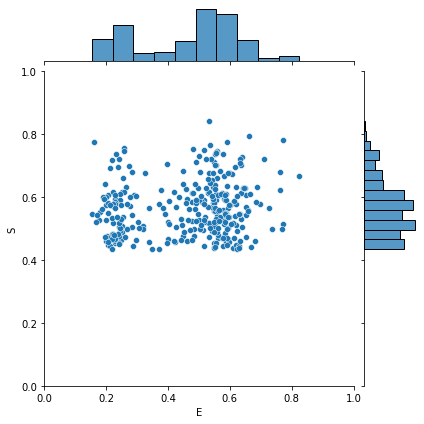

In [91]:
# Initial data exploration using a jointplot (similar to what has been plotted in Mars Rover)
df = pd.DataFrame(zip(E,S), columns = ['E','S'])
sns.jointplot(x='E', y='S', data=df, xlim = [0,1], ylim = [0,1])

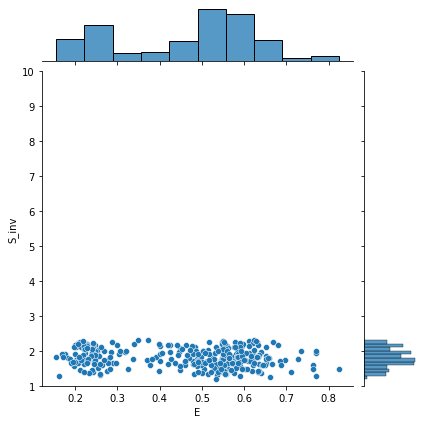

In [92]:
Sinv_array = pd.Series(Sinv)
df2 = pd.DataFrame(zip(E,Sinv), columns = ['E','S_inv'])
sns.jointplot(x='E', y='S_inv', data=df2, ylim = [1,10])

0 1.81 0.81 1.0


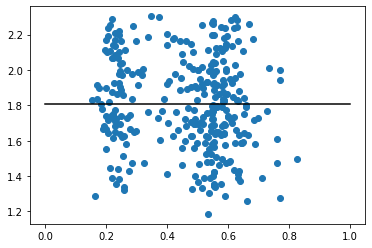

In [95]:
from sklearn.linear_model import LinearRegression
E_array = np.array(E)

#reg = LinearRegression().fit(E_array.reshape(-1, 1),Sinv)
#a = reg.coef_[0]
#b = reg.intercept_
a = 0
b = 1.81
beta = a + b -1
gamma = (b-1)/beta

x=list(np.arange(0, 1.05, 0.05))
y=[]

for i in x:
    y.append(a*i + b)
    
df3 = pd.DataFrame(zip(x,y), columns = ['x','y'])
plt.plot(x,y, color = "black")
plt.scatter(df2['E'], df2['S_inv'])

print(a, b, beta, gamma)

In [94]:
sum(Sinv)/len(Sinv)

1.806674869924278

Now define the gaussian function and make the fit against all E values. Print the fit parameters and corresponding errors and plot the result for a visual inspection

The fitted peak center lies at E = 0.4748864727464714 
 Sigma: 0.08173534766591156


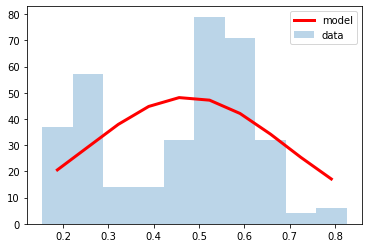

In [74]:
y,x,_=hist(E,10, alpha=0.3,label="data")
x=(x[1:]+x[:-1])/2 #required to define x as the middle of the box

#Define the gaussian function to fit against
def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

#Make and plot the fit
expected=(0.25,0.15,33) #expected peak center, width and height (mu, sigma, A)
params,cov=curve_fit(gauss,x,y,expected)
plot(x,gauss(x,*params),color='red',lw=3,label='model')
legend()
sigma=sqrt(diag(cov))
print('The fitted peak center lies at E =',params[0],'\n','Sigma:',sigma[0]) #prints the fit parameters and errors that were found
E_fit = list(params)

The fitted peak center lies at S = 0.5402926495331324 
 Sigma: 0.00828783394777817


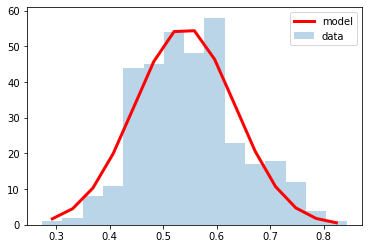

In [75]:
y,x,_=hist(S, 15, alpha=0.3,label="data")
x=(x[1:]+x[:-1])/2 #required to define x as the middle of the box

#Define the gaussian function to fit against
def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

#Make and plot the fit
expected=(0.5,0.15,18) #expected peak center, width and height (mu, sigma, A)
params,cov=curve_fit(gauss,x,y,expected)
plot(x,gauss(x,*params),color='red',lw=3,label='model')
legend()
sigma=sqrt(diag(cov))
print('The fitted peak center lies at S =', params[0],'\n','Sigma:',sigma[0]) #prints the fit parameters and errors that were found
S_fit = list(params)